<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_2_2_Regressa%CC%83o_Outros_tipos_de_regressa%CC%83o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Reconecte ao Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive/cursoML", DRIVE_DIRECTORY)

---

In [3]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## Regressão polinomial

Comece recuperando os dados previsores e alvo, de treino e de teste, a partir do arquivo `parkinson.pkl` salvo na pasta do Drive. Lembre-se de que você deve instanciar as variáveis `X` e `y`, dos splits `train` e `test`,  na mesma ordem que salvou.

In [4]:
with open(os.path.join(DRIVE_DIRECTORY, "parkinson.pkl"), "rb") as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

Instancie um transformador do tipo `PolynomialFeatures` com `degree=4`. Utilize ele para transformar os atributos previsores de treino e de teste.

In [12]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Confira o `shape` dos dados previsores de treino, antes e depois de aplicar o transformador polinomial.

In [13]:
X_train.shape, X_train_poly.shape

((4406, 19), (4406, 8855))

Instancie um regressor linear, e treine utilizando as variáveis preditoras polinomiais.

In [14]:
lrp = LinearRegression()
lrp.fit(X_train_poly, y_train)

LinearRegression()

Calcule o score deste regressor com os dados de treino.

In [15]:
lrp.score(X_train_poly, y_train)

0.7108898829170789

E também com os dados de teste.

In [16]:
lrp.score(X_test_poly, y_test)

-9.928329765223186

Utilize o regressor para fazer predições baseadas nos dados de treinamento.

In [17]:
y_pred = lrp.predict(X_train_poly)

Exiba o erro absoluto médio para este split.

In [18]:
mean_absolute_error(y_train, y_pred)

4.345951218528539

Exiba uma comparação da variável de treino entre os valores reais e preditos, na forma de um gráfico de linhas.

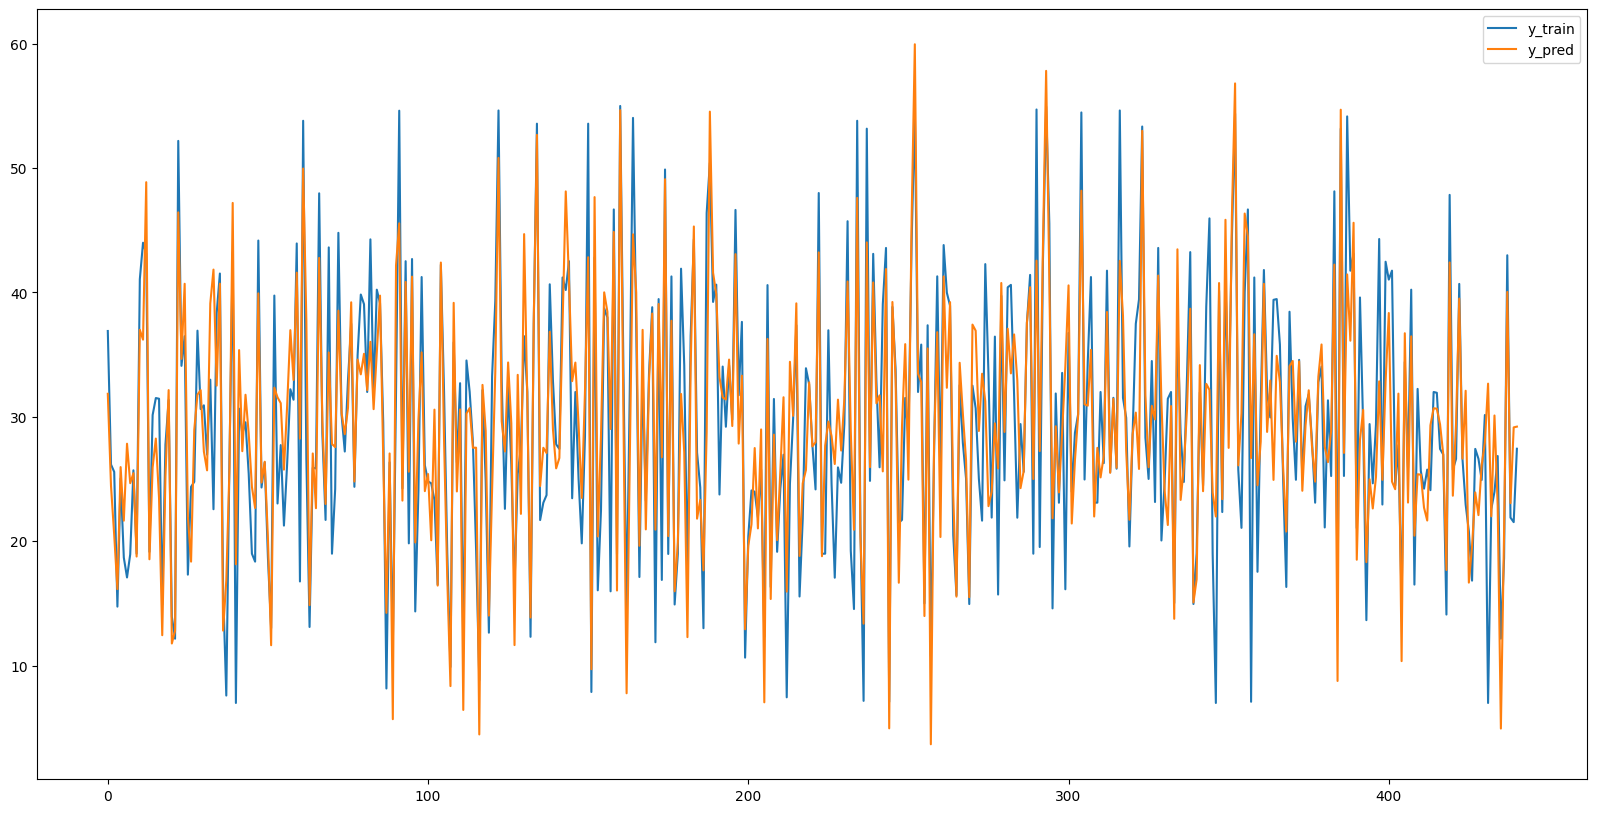

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(y_train[::10], label="y_train")
plt.plot(y_pred[::10], label="y_pred")
plt.legend()

Tanto pelo score quanto pelo gráfico, é possível observar que, para os dados de treino, este preditor se saiu melhor do que a regressão linear múltipla da última sessão.

Agora faça predições para os dados de teste, exiba o erro absoluto médio e o gráfico de comparação.

In [20]:
y_pred = lrp.predict(X_test_poly)

In [22]:
mean_absolute_error(y_test, y_pred)

10.094547042939753

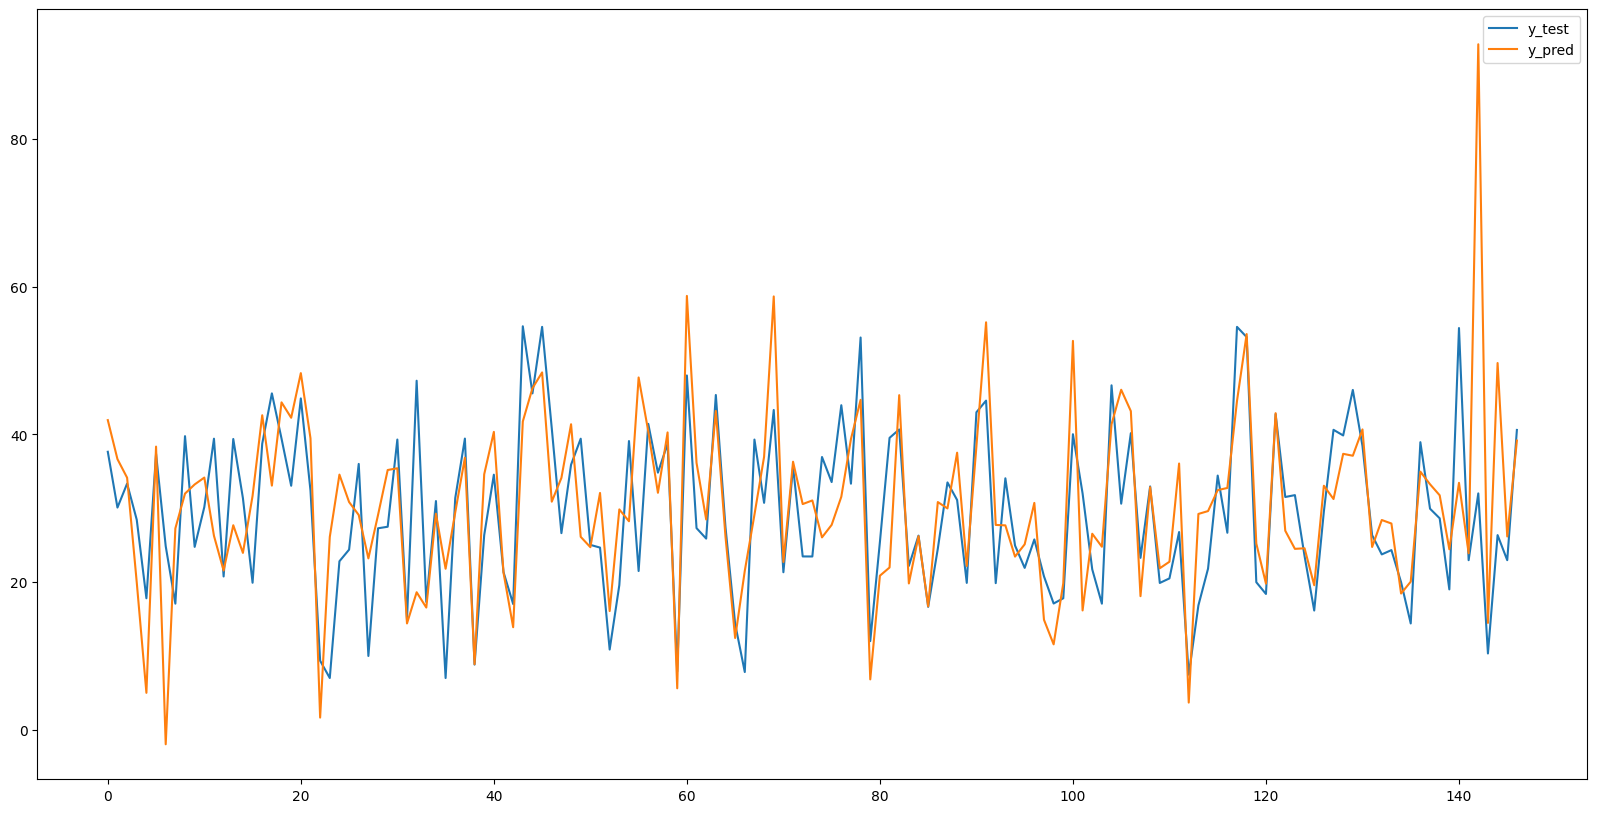

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[::10], label="y_test")
plt.plot(y_pred[::10], label="y_pred")
plt.legend()

No split de teste, os resultados ficaram ainda piores do que o regressor linear, perceba que o novo regressor fez predições bastante extremas, por isso o gráfico parece achatado.

## Árvores de decisão

Instancie e treine um regressor do tipo árvore de decisão.

In [24]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Exiba o score deste regressor para os dados de treinamento.

In [25]:
tree.score(X_train, y_train)

1.0

Este valor indica que as regressões ficaram perfeitas, coincidindo com os valores reais. Faça as predições para este split, exiba o erro absoluto médio e também a comparação no gráfico.

In [26]:
y_pred = tree.predict(X_train)

In [27]:
mean_absolute_error(y_train, y_pred)

2.5681781813389914e-16

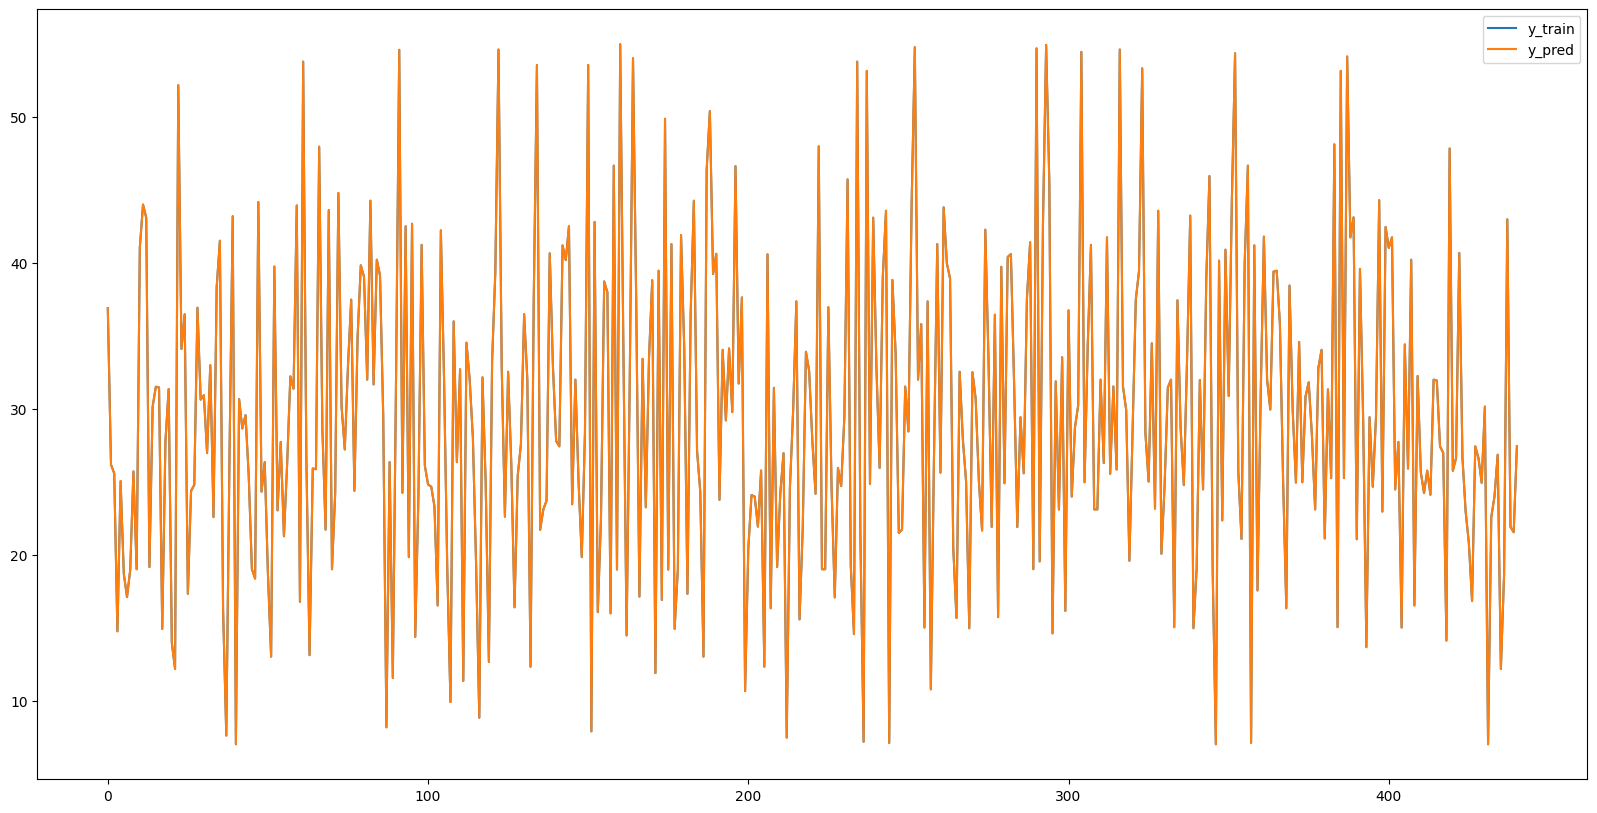

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(y_train[::10], label="y_train")
plt.plot(y_pred[::10], label="y_pred")
plt.legend()

O erro é aproximadamente igual a zero, e o gráfico confirma predições alinhadas com os valores reais.

Agora repita o procedimento de avaliação para o split de teste.

In [31]:
tree.score(X_test, y_test)

0.9078790106968356

In [29]:
y_pred = tree.predict(X_test)

In [30]:
mean_absolute_error(y_test, y_pred)

0.7621130020422057

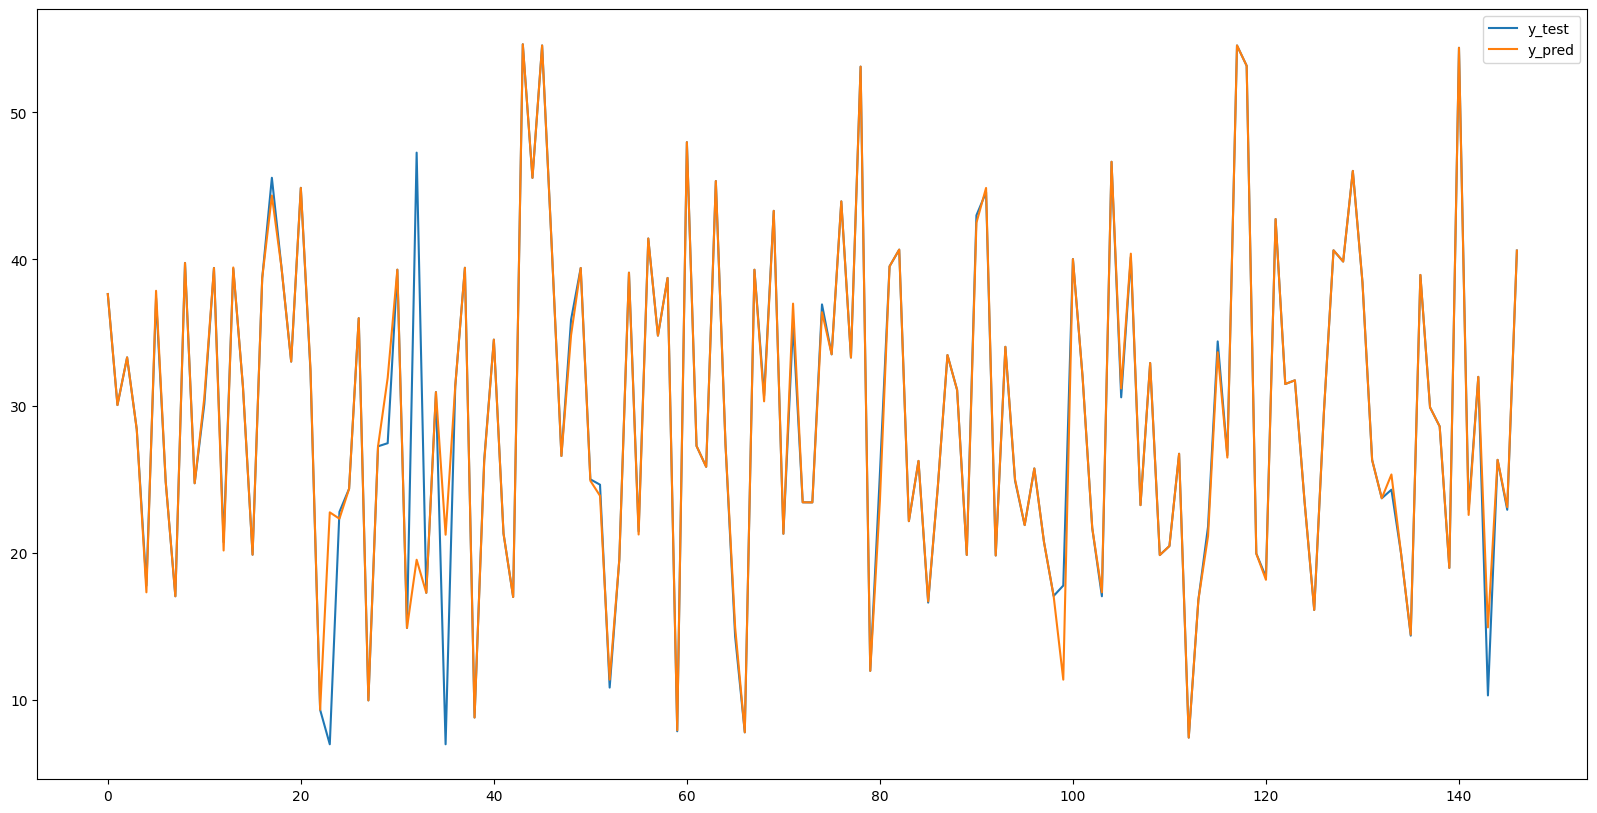

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[::10], label="y_test")
plt.plot(y_pred[::10], label="y_pred")
plt.legend()

Como é normal, o desempenho no split de teste não ficou tão bom quanto no split de treinamento, mas ainda assim ficou excelente, com poucos valores preditos diferentes dos reais.

## RandomForest

Refaça o exercício agora utilizando um regressor do tipo Random Forest. Utilize `n_estimators=10`.

In [34]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [35]:
rf.score(X_train, y_train)

0.9923351432752304

In [36]:
y_pred = rf.predict(X_train)

In [37]:
mean_absolute_error(y_train, y_pred)

0.37954387199273754

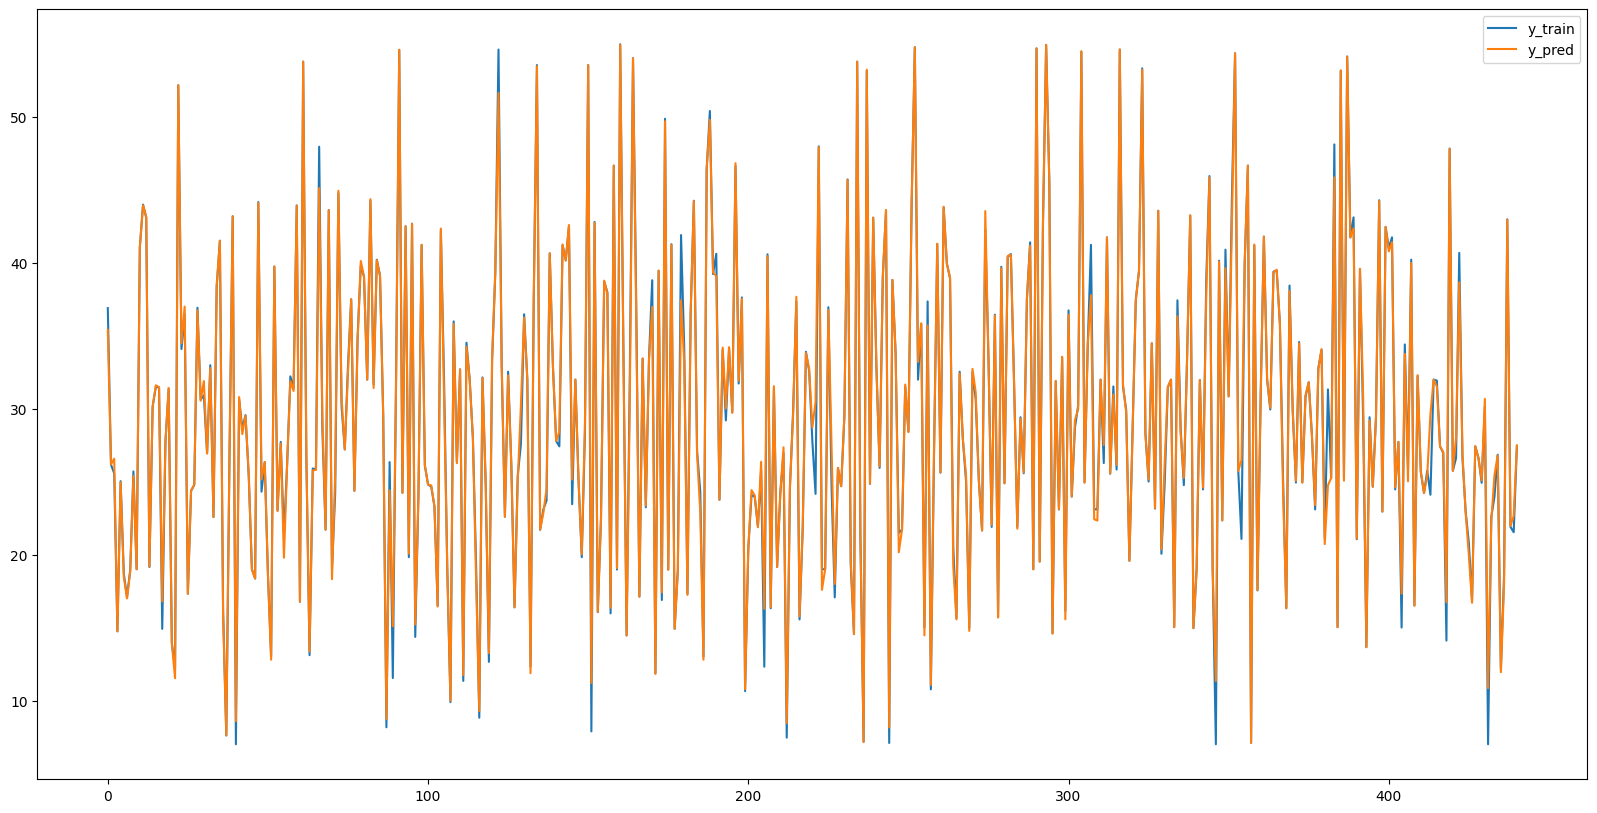

In [38]:
plt.figure(figsize=(20, 10))
plt.plot(y_train[::10], label="y_train")
plt.plot(y_pred[::10], label="y_pred")
plt.legend()

Este regressor ficou um pouco pior que a árvore de decisão no split de treinamento, mas ainda assim muito bom!

E no split de teste?

In [39]:
rf.score(X_test, y_test)

0.9630254978746178

In [40]:
y_pred = rf.predict(X_test)

In [41]:
mean_absolute_error(y_test, y_pred)

0.9072607828454732

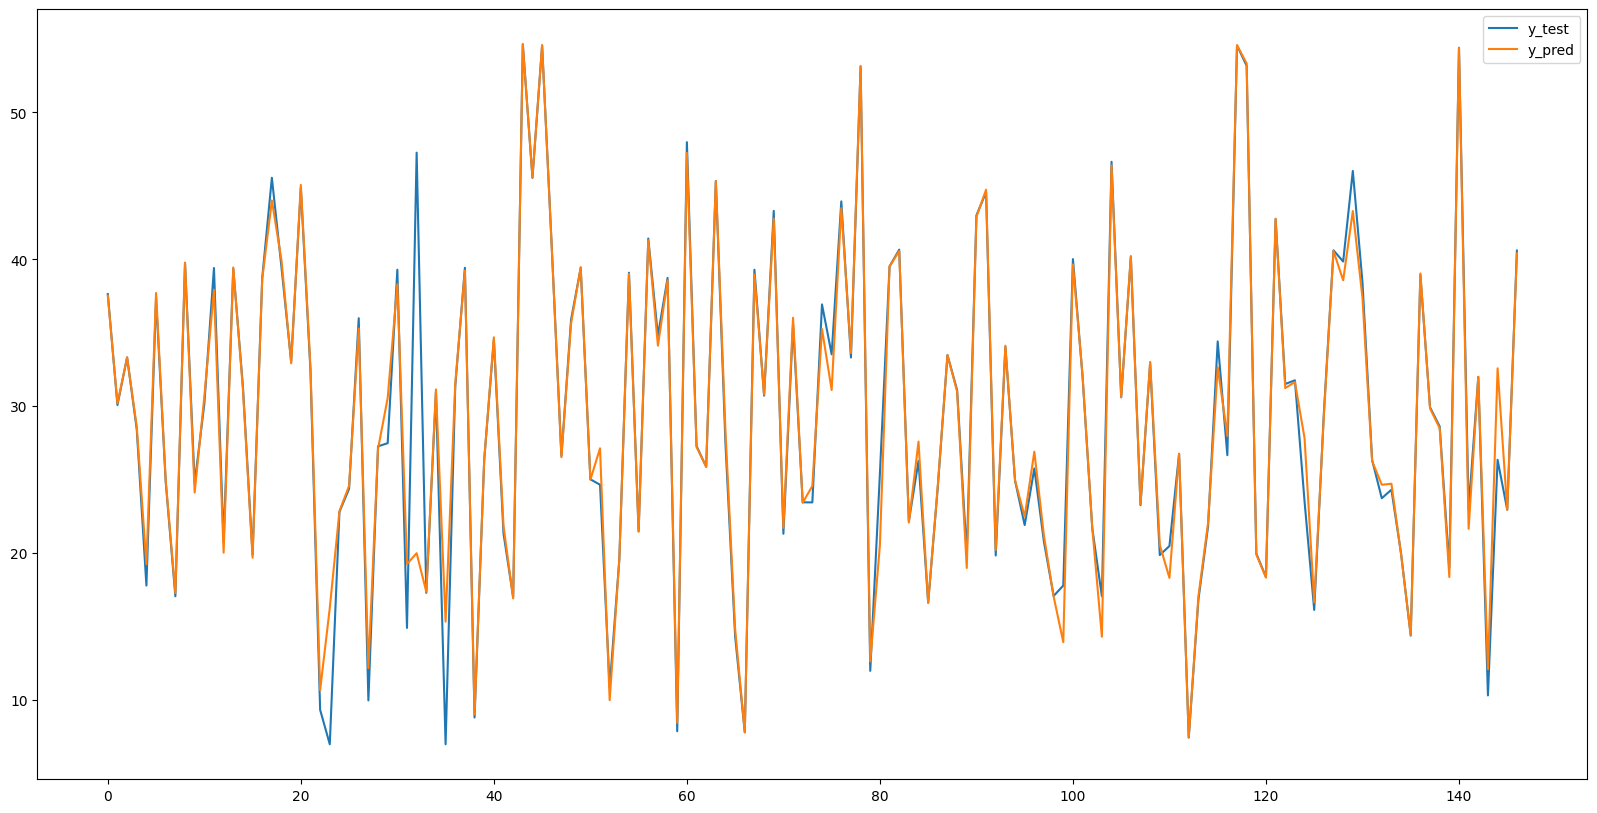

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[::10], label="y_test")
plt.plot(y_pred[::10], label="y_pred")
plt.legend()

O score ficou um pouco melhor que a árvore de decisão, apesar de o erro médio ter ficado um pouco maior. Isso indica que, em média, o erro aumentou, mas temos menos valores extremos.

## SVM

Instancie um regressor do tipo SVM, com `kernel="linear"`, e ajuste com os dados de treino.

In [49]:
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

SVR(kernel='linear')

Exiba o score para os dados de treino e de teste.

In [50]:
svr.score(X_train, y_train)

0.14348590204709477

In [51]:
svr.score(X_test, y_test)

0.12219989901078598

Este regressor não se saiu muito bem.

Instancie e treine outro regressor do tipo SVM, mas agora com `kernel="poly"` e `degree=4`.

In [52]:
svr = SVR(kernel="poly", degree=4)
svr.fit(X_train, y_train)

SVR(degree=4, kernel='poly')

Exiba os scores.

In [53]:
svr.score(X_train, y_train)

0.04909745897454865

In [54]:
svr.score(X_test, y_test)

0.045542317536284016

O resultado ficou ainda pior.

Agora vamos tentar um regressor SVM com `kernel="rbf"`. Para isso, primeiro precisamos escalonar os valores.

Instancie um escalonador para os atributos previsores, e outro para o atributo alvo, ambos do tipo `StandardScaler`.

In [55]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

Agora escalone os dados de treinamento. Lembre-se que, no caso de `y`, você deve primeiro utilizar `reshape(-1, 1)`, para apresentá-los ao escalonador no formato coluna, e depois da transformação, voltar a linearizá-lo com `ravel()`.

In [56]:
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

Transforme também os dados de teste.

In [57]:
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

Agora sim instancie o regressor e ajuste com os dados escalonados.

In [58]:
svr_rbf = SVR(kernel="rbf")
svr_rbf.fit(X_train_scaled, y_train_scaled)


SVR()

Exiba os scores do regressor.

In [61]:
svr_rbf.score(X_train_scaled, y_train_scaled)

0.5004794038369794

In [62]:
svr_rbf.score(X_test_scaled, y_test_scaled)

0.4630396752885664

Os resultados melhoraram em comparação aos outros kernels.

Utilize o regressor para fazer predições no split de teste. Depois, como esses dados estão escalonados, utilize o método `inverse_transform` do escalonador para retorná-los à escala original. Lembre-se dos cuidados com os `shape`s ao invocar o escalonador.

In [63]:
y_pred = svr_rbf.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

Agora exiba o erro absoluto médio para os dados de teste em sua escala original.

In [64]:
mean_absolute_error(y_test, y_pred)

5.616380997616371

## Redes neurais artificiais

Instancie um regressor do tipo rede neural, com `max_iter=1000`. Treine este modelo com os dados escalonados.

In [65]:
neural_net = MLPRegressor(max_iter=1000)
neural_net.fit(X_train_scaled, y_train_scaled)

MLPRegressor(max_iter=1000)

Exiba os scores do regressor.

In [66]:
neural_net.score(X_train_scaled, y_train_scaled)

0.7882657450231807

In [67]:
neural_net.score(X_test_scaled, y_test_scaled)

0.6871342825895461

Faça predições para os dados de teste. Lembre-se de, depois, retornar os valores preditos para sua escala original.

In [68]:
y_pred = neural_net.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

Exiba o erro absoluto médio para os dados de teste.

In [69]:
mean_absolute_error(y_test, y_pred)

4.269527599015203